In [253]:
# Importing necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# Chennai House Price Prediction


In [254]:
df=pd.read_csv('chennai_house_price_prediction.csv')

In [255]:
df.head()

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,131,1.0,1.0,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,144400,7600000
1,P09411,Anna Nagar,1986,26,2.0,1.0,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,304049,21717770
2,P01812,Adyar,909,70,1.0,1.0,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,92114,13159200
3,P05346,Velachery,1855,14,3.0,2.0,5,Family,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,77042,9630290
4,P06210,Karapakkam,1226,84,1.0,1.0,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,74063,7406250


# Data Exploration

In [256]:
df.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
count,7109.000000,7109.000000,7108.000000,7104.000000,7109.000000,7109.000000,7109.000000,7109.000000,7061.000000,7109.000000,7.109000e+03
mean,1382.073006,99.603179,1.637029,1.213260,3.688704,3.517471,3.507244,3.485300,3.503254,141005.726544,1.089491e+07
std,457.410902,57.403110,0.802902,0.409639,1.019099,0.891972,0.897834,0.887266,0.527223,78768.093718,3.768603e+06
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,5055.000000,2.156875e+06
25%,993.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,84219.000000,8.272100e+06
50%,1373.000000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.500000,127628.000000,1.033505e+07
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.890000,184506.000000,1.299390e+07
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,495405.000000,2.366734e+07


In [257]:
df.describe(include='all')

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
count,7109,7109,7109.000000,7109.000000,7108.000000,7104.000000,7109.000000,7109,7109,7109,7109,7109,7109,7109.000000,7109.000000,7109.000000,7061.000000,7109.000000,7.109000e+03
unique,7109,17,NaN,NaN,NaN,NaN,NaN,9,3,5,5,5,6,NaN,NaN,NaN,NaN,NaN,NaN
top,P09550,Chrompet,NaN,NaN,NaN,NaN,NaN,AdjLand,Yes,House,AllPub,Paved,RL,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1681,NaN,NaN,NaN,NaN,NaN,1433,3587,2444,1886,2560,1858,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,1382.073006,99.603179,1.637029,1.213260,3.688704,NaN,NaN,NaN,NaN,NaN,NaN,3.517471,3.507244,3.485300,3.503254,141005.726544,1.089491e+07
std,NaN,NaN,457.410902,57.403110,0.802902,0.409639,1.019099,NaN,NaN,NaN,NaN,NaN,NaN,0.891972,0.897834,0.887266,0.527223,78768.093718,3.768603e+06
min,NaN,NaN,500.000000,0.000000,1.000000,1.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,2.000000,2.000000,2.000000,5055.000000,2.156875e+06
25%,NaN,NaN,993.000000,50.000000,1.000000,1.000000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.700000,2.700000,2.700000,3.130000,84219.000000,8.272100e+06
50%,NaN,NaN,1373.000000,99.000000,1.000000,1.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,3.500000,3.500000,3.500000,3.500000,127628.000000,1.033505e+07
75%,NaN,NaN,1744.000000,148.000000,2.000000,1.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,4.300000,4.300000,4.300000,3.890000,184506.000000,1.299390e+07


In [258]:
df.isnull()

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7105,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7106,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7107,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [259]:
df.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
COMMIS            0
SALES_PRICE       0
dtype: int64

In [260]:
df.dtypes

PRT_ID            object
AREA              object
INT_SQFT           int64
DIST_MAINROAD      int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
COMMIS             int64
SALES_PRICE        int64
dtype: object

In [261]:
# Storing 
temp = pd.DataFrame(index=df.columns)
temp['data_type']=df.dtypes
temp['null_count']=df.isnull().sum()
temp['unique_count']=df.nunique()

In [262]:
temp

,data_type,null_count,unique_count
PRT_ID,object,0,7109
AREA,object,0,17
INT_SQFT,int64,0,1699
DIST_MAINROAD,int64,0,201
N_BEDROOM,float64,1,4
N_BATHROOM,float64,5,2
N_ROOM,int64,0,5
SALE_COND,object,0,9
PARK_FACIL,object,0,3
BUILDTYPE,object,0,5


# Univariate Analysis

Text(0.5, 0, 'Sales')

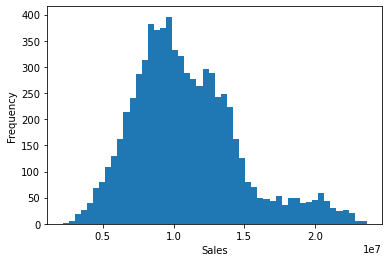

In [263]:
#Continous Variables

df['SALES_PRICE'].plot.hist(bins=50)
plt.xlabel('Sales')

<AxesSubplot:ylabel='Frequency'>

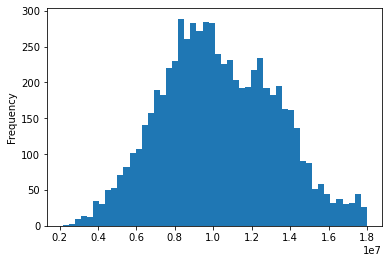

In [264]:
df['SALES_PRICE'].loc[df['SALES_PRICE']<18000000].plot.hist(bins=50)

<AxesSubplot:ylabel='Frequency'>

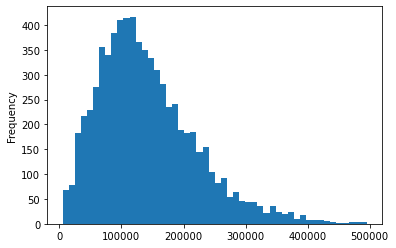

In [265]:
df['COMMIS'].plot.hist(bins=50)

<AxesSubplot:ylabel='Frequency'>

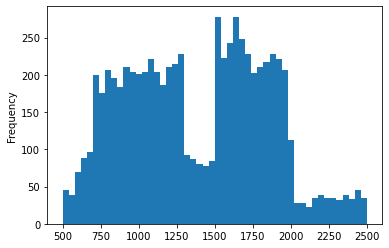

In [266]:
df['INT_SQFT'].plot.hist(bins=50)

<AxesSubplot:ylabel='Frequency'>

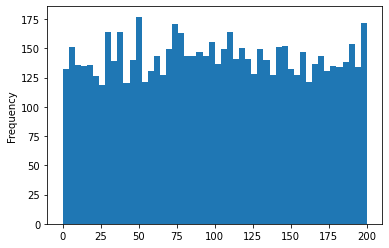

In [267]:
df['DIST_MAINROAD'].plot.hist(bins=50)

In [268]:
# Categorical Variables

df['N_BEDROOM'].value_counts()

1.0    3795
2.0    2352
3.0     707
4.0     254
Name: N_BEDROOM, dtype: int64

In [269]:
# Bathroom, Bedroom and Rooms should be categorical variables
df['N_BEDROOM'].value_counts()/len(df)*100

1.0    53.383036
2.0    33.084822
3.0     9.945140
4.0     3.572936
Name: N_BEDROOM, dtype: float64

In [270]:
df['N_BATHROOM'].value_counts()/len(df)*100

1.0    78.618652
2.0    21.311014
Name: N_BATHROOM, dtype: float64

In [271]:
df['N_ROOM'].value_counts()/len(df)*100

4    36.052891
3    29.891687
5    17.527078
2    12.955409
6     3.572936
Name: N_ROOM, dtype: float64

<AxesSubplot:>

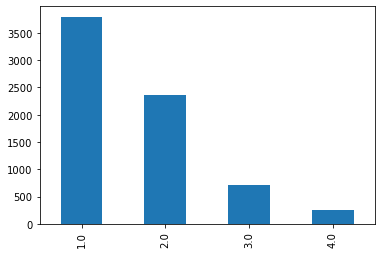

In [272]:
df['N_BEDROOM'].value_counts().plot.bar()

<AxesSubplot:>

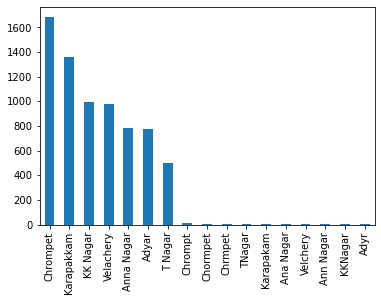

In [273]:
df['AREA'].value_counts().plot(kind='bar')

<AxesSubplot:>

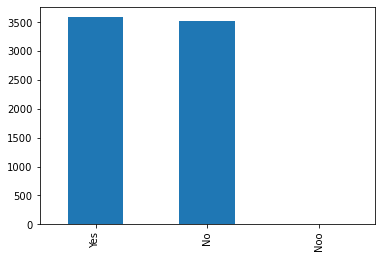

In [274]:
df['PARK_FACIL'].value_counts().plot.bar()

In [275]:
df['PARK_FACIL'].value_counts()

Yes    3587
No     3520
Noo       2
Name: PARK_FACIL, dtype: int64

# DATA MANIPULATION

# Drop Duplicates(if any)

In [276]:
df = pd.read_csv('chennai_house_price_prediction.csv')

In [277]:
df.drop_duplicates()

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,131,1.0,1.0,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,144400,7600000
1,P09411,Anna Nagar,1986,26,2.0,1.0,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,304049,21717770
2,P01812,Adyar,909,70,1.0,1.0,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,92114,13159200
3,P05346,Velachery,1855,14,3.0,2.0,5,Family,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,77042,9630290
4,P06210,Karapakkam,1226,84,1.0,1.0,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,74063,7406250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,P03834,Karapakkam,598,51,1.0,1.0,2,AdjLand,No,Others,ELO,No Access,RM,3.0,2.2,2.4,2.520,107060,5353000
7105,P10000,Velachery,1897,52,3.0,2.0,5,Family,Yes,Others,NoSeWa,No Access,RH,3.6,4.5,3.3,3.920,205551,10818480
7106,P09594,Velachery,1614,152,2.0,1.0,4,Normal Sale,No,House,NoSeWa,Gravel,I,4.3,4.2,2.9,3.840,167028,8351410
7107,P06508,Karapakkam,787,40,1.0,1.0,2,Partial,Yes,Commercial,ELO,Paved,RL,4.6,3.8,4.1,4.160,119098,8507000


# missing values

In [278]:
df.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
COMMIS            0
SALES_PRICE       0
dtype: int64

In [279]:
#dropping rows with missing values
#dropping columns with missing values

df.dropna(axis=0,how='any')
df.dropna(axis=1,how='any')

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,131,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,144400,7600000
1,P09411,Anna Nagar,1986,26,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,304049,21717770
2,P01812,Adyar,909,70,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,92114,13159200
3,P05346,Velachery,1855,14,5,Family,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,77042,9630290
4,P06210,Karapakkam,1226,84,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,74063,7406250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,P03834,Karapakkam,598,51,2,AdjLand,No,Others,ELO,No Access,RM,3.0,2.2,2.4,107060,5353000
7105,P10000,Velachery,1897,52,5,Family,Yes,Others,NoSeWa,No Access,RH,3.6,4.5,3.3,205551,10818480
7106,P09594,Velachery,1614,152,4,Normal Sale,No,House,NoSeWa,Gravel,I,4.3,4.2,2.9,167028,8351410
7107,P06508,Karapakkam,787,40,2,Partial,Yes,Commercial,ELO,Paved,RL,4.6,3.8,4.1,119098,8507000


In [280]:
df['N_BEDROOM'].mode()

0    1.0
dtype: float64

In [281]:
df['N_BEDROOM'].fillna(df['N_BEDROOM'].mode()[0],inplace=True)

In [282]:
for i in range(0,len(df)):
    if pd.isnull(df['N_BEDROOM'][i])==True:
        if( df['N_BEDROOM'][i]==1):
            df['N_BATHROOM']= 1.0
        else:
            df['N_BATHROOM']=2.0

In [283]:
df[['QS_ROOMS','QS_BATHROOM','QS_BEDROOM','QS_OVERALL']].head()

,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL
0,4.0,3.9,4.9,4.330
1,4.9,4.2,2.5,3.765
2,4.1,3.8,2.2,3.090
3,4.7,3.9,3.6,4.010
4,3.0,2.5,4.1,3.290


In [284]:
temp=(df['QS_ROOMS'] + df['QS_BATHROOM'] + df['QS_BEDROOM'])/3
pd.concat([df['QS_ROOMS'],df['QS_BATHROOM'],df['QS_BEDROOM'],temp],axis=1).head(10)

,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,0
0,4.0,3.9,4.9,4.266667
1,4.9,4.2,2.5,3.866667
2,4.1,3.8,2.2,3.366667
3,4.7,3.9,3.6,4.066667
4,3.0,2.5,4.1,3.200000
5,4.5,2.6,3.1,3.400000
6,3.6,2.1,2.5,2.733333
7,2.4,4.5,2.1,3.000000
8,2.9,3.7,4.0,3.533333
9,3.1,3.1,3.3,3.166667


In [285]:
df.loc[df['QS_OVERALL'].isnull()==True].shape

(48, 19)

In [286]:
def fill_na(x):
    return((x['QS_ROOMS']+x['QS_BATHROOM']+x['QS_BEDROOM'])/3)

In [287]:
df['QS_OVERALL']=df.apply(lambda x: fill_na(x) if pd.isnull(x['QS_OVERALL']) else x['QS_OVERALL'],axis=1)

In [288]:
df.isnull().sum()

PRT_ID           0
AREA             0
INT_SQFT         0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       5
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
COMMIS           0
SALES_PRICE      0
dtype: int64

# data types

In [289]:
df.dtypes

PRT_ID            object
AREA              object
INT_SQFT           int64
DIST_MAINROAD      int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
COMMIS             int64
SALES_PRICE        int64
dtype: object

In [290]:
# changing continous tp categorical vriables
df=df.astype({'N_ROOM':'object','N_BATHROOM':'object','N_BEDROOM':'object'})

In [291]:
df.dtypes

PRT_ID            object
AREA              object
INT_SQFT           int64
DIST_MAINROAD      int64
N_BEDROOM         object
N_BATHROOM        object
N_ROOM            object
SALE_COND         object
PARK_FACIL        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
COMMIS             int64
SALES_PRICE        int64
dtype: object

In [292]:
temp=['AREA','N_BEDROOM','N_BATHROOM','N_ROOM','SALE_COND','PARK_FACIL','BUILDTYPE','UTILITY_AVAIL','STREET','MZZONE']
for i in temp:
         print('**************value count in',i,'***************')
         print(df[i].value_counts())
         print('')

**************value count in AREA ***************
Chrompet      1681
Karapakkam    1363
KK Nagar       996
Velachery      979
Anna Nagar     783
Adyar          773
T Nagar        496
Chrompt          9
Chormpet         6
Chrmpet          6
TNagar           5
Karapakam        3
Ana Nagar        3
Velchery         2
Ann Nagar        2
KKNagar          1
Adyr             1
Name: AREA, dtype: int64

**************value count in N_BEDROOM ***************
1.0    3796
2.0    2352
3.0     707
4.0     254
Name: N_BEDROOM, dtype: int64

**************value count in N_BATHROOM ***************
1.0    5589
2.0    1515
Name: N_BATHROOM, dtype: int64

**************value count in N_ROOM ***************
4    2563
3    2125
5    1246
2     921
6     254
Name: N_ROOM, dtype: int64

**************value count in SALE_COND ***************
AdjLand        1433
Partial        1429
Normal Sale    1423
AbNormal       1406
Family         1403
Adj Land          6
Ab Normal         5
Partiall          3
PartiaLl  

In [293]:
df['AREA'].replace({'Chrompt':'Chrompet','Chormpet':'Chrompet','Chrmpet':'Chrompet','Karapakam':'Karapakkam','KKNagar':'KK Nagar','Velchery':'Velachery','Ana Nagar':'Anna Nagar','Ann Nagar':'Anna Nagar','Adyr':'Adyar','TNagar':'T Nagar'},inplace=True )

In [294]:
df['AREA'].value_counts()

Chrompet      1702
Karapakkam    1366
KK Nagar       997
Velachery      981
Anna Nagar     788
Adyar          774
T Nagar        501
Name: AREA, dtype: int64

In [295]:
df['PARK_FACIL'].replace({'Noo':'No'},inplace=True)
df['PARK_FACIL'].value_counts()

Yes    3587
No     3522
Name: PARK_FACIL, dtype: int64

In [296]:
df['UTILITY_AVAIL'].replace({'All Pub':'AllPub'},inplace=True)

In [297]:
df['UTILITY_AVAIL'].value_counts()

AllPub     1887
NoSeWa     1871
NoSewr     1829
ELO        1522
Name: UTILITY_AVAIL, dtype: int64

In [298]:
df['SALE_COND'].replace({'Adj Land':'AdjLand','Partiall':'Partial','PartiaLl':'Partial','Ab Normal':'AbNormal'},inplace=True)
df['SALE_COND'].value_counts()

AdjLand        1439
Partial        1433
Normal Sale    1423
AbNormal       1411
Family         1403
Name: SALE_COND, dtype: int64

In [299]:
df['BUILDTYPE'].replace({'Comercial':'Commercial','Other':'Others'},inplace=True)
df['BUILDTYPE'].value_counts()

House         2444
Others        2336
Commercial    2329
Name: BUILDTYPE, dtype: int64

In [300]:
df['STREET'].replace({'Pavd':'Paved','NoAccess':'No Access'},inplace=True)
df['STREET'].value_counts()


Paved        2572
Gravel       2520
No Access    2017
Name: STREET, dtype: int64

In [301]:
df.shape

(7109, 19)

In [302]:
df.value_counts()

PRT_ID  AREA        INT_SQFT  DIST_MAINROAD  N_BEDROOM  N_BATHROOM  N_ROOM  SALE_COND    PARK_FACIL  BUILDTYPE   UTILITY_AVAIL  STREET     MZZONE  QS_ROOMS  QS_BATHROOM  QS_BEDROOM  QS_OVERALL  COMMIS  SALES_PRICE
P10034  Velachery   1968      51             3.0        2.0         5       AbNormal     No          Others      AllPub         No Access  C       3.7       4.4          4.7         4.32        103442  8620150        1
P03366  Karapakkam  505       168            1.0        1.0         2       AdjLand      Yes         Others      ELO            Paved      RH      3.4       4.9          3.1         3.73        69251   5770875        1
P03350  Karapakkam  1350      144            2.0        2.0         4       Normal Sale  No          Commercial  ELO            Paved      I       2.3       2.0          5.0         3.29        219291  9967750        1
P03352  Chrompet    1230      17             2.0        1.0         4       Normal Sale  Yes         Commercial  NoSeWa         G

# Bivariate Analysis

In [303]:
df.columns

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE',
       'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM',
       'QS_BEDROOM', 'QS_OVERALL', 'COMMIS', 'SALES_PRICE'],
      dtype='object')

#Interior Area and Sales Price 

<AxesSubplot:xlabel='INT_SQFT', ylabel='SALES_PRICE'>

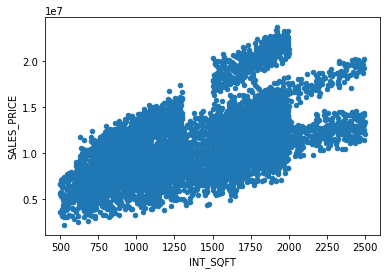

In [304]:
df.plot.scatter('INT_SQFT','SALES_PRICE')

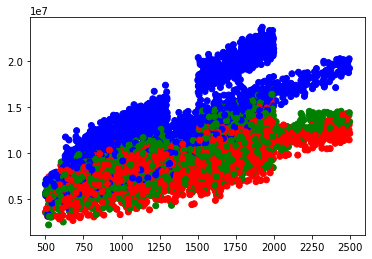

In [305]:
fig, ax = plt.subplots()
temp = {'Commercial':'blue','House':'red','Others':'green'}
ax.scatter(df['INT_SQFT'], df['SALES_PRICE'], c=df['BUILDTYPE'].apply(lambda x: temp[x])) 

In [306]:
# Sale Price V/S no of bedroom and bathroom

df.pivot_table('SALES_PRICE', 'N_BEDROOM', 'N_BATHROOM','median')

N_BATHROOM,1.0,2.0
N_BEDROOM,,
1.0,9168740.0,NaN
2.0,12129780.0,9117500.0
3.0,NaN,11663490.0
4.0,NaN,13172000.0


<AxesSubplot:xlabel='[QS_OVERALL]', ylabel='[SALES_PRICE]'>

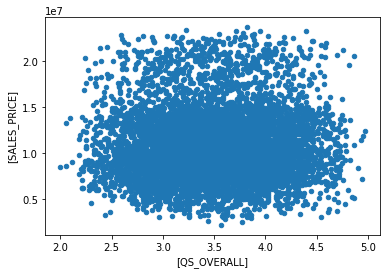

In [307]:
# QS_OVERALL and SALES_PRICE

df.plot.scatter(['QS_OVERALL'],['SALES_PRICE'])

Text(0.5, 1.0, 'QS_OVERALL')

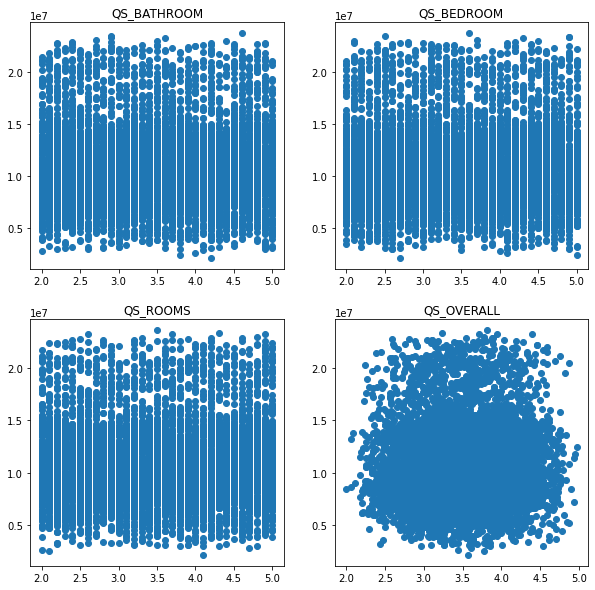

In [350]:
fig, axs =plt.subplots(2,2)
fig.set_figheight(10)
fig.set_figwidth(10)

axs[0,0].scatter(df['QS_BATHROOM'], df['SALES_PRICE'])
axs[0,0].set_title('QS_BATHROOM')

axs[0,1].scatter(df['QS_BEDROOM'], df['SALES_PRICE'])
axs[0,1].set_title('QS_BEDROOM')

axs[1,0].scatter(df['QS_ROOMS'], df['SALES_PRICE'])
axs[1,0].set_title('QS_ROOMS')

axs[1,1].scatter(df['QS_OVERALL'], df['SALES_PRICE'])
axs[1,1].set_title('QS_OVERALL')

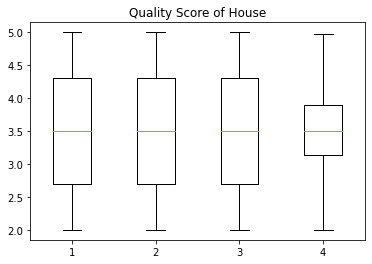

In [327]:
ax =plt.figure().add_subplot(111)
ax.set_title('Quality Score of House')

bp =ax.boxplot([df['QS_BATHROOM'], df['QS_BEDROOM'], df['QS_ROOMS'], df['QS_OVERALL']])

In [328]:
#buildtype of house V/S sales price
df.groupby(['BUILDTYPE']).SALES_PRICE.median()

BUILDTYPE
Commercial    13356200
House          8985370
Others         9637260
Name: SALES_PRICE, dtype: int64

<AxesSubplot:ylabel='Frequency'>

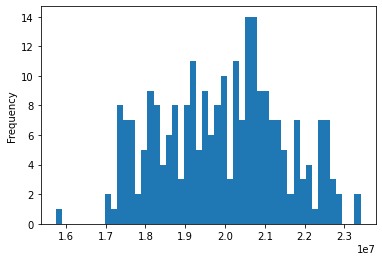

In [330]:
temp=df.loc[(df['BUILDTYPE']=='Commercial')&(df['AREA']=='Anna Nagar')]
temp['SALES_PRICE'].plot.hist(bins=50)

In [331]:
df.groupby(['BUILDTYPE','PARK_FACIL']).SALES_PRICE.median()

BUILDTYPE   PARK_FACIL
Commercial  No            12692985
            Yes           13920600
House       No             8514140
            Yes            9468150
Others      No             9104645
            Yes           10039405
Name: SALES_PRICE, dtype: int64

<AxesSubplot:xlabel='BUILDTYPE,PARK_FACIL'>

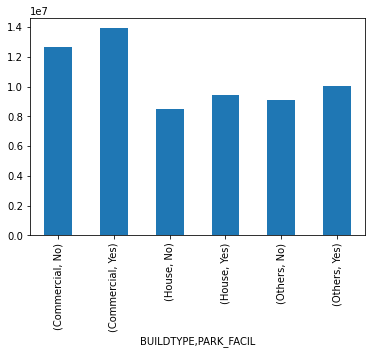

In [333]:
temp=df.groupby(['BUILDTYPE','PARK_FACIL']).SALES_PRICE.median()
temp.plot.bar(stacked=True)

In [335]:
df.pivot_table('SALES_PRICE','AREA',aggfunc='median')

,SALES_PRICE
AREA,
Adyar,8878350
Anna Nagar,13727895
Chrompet,9606725
KK Nagar,12146740
Karapakkam,7043125
T Nagar,14049650
Velachery,10494410


<AxesSubplot:ylabel='Frequency'>

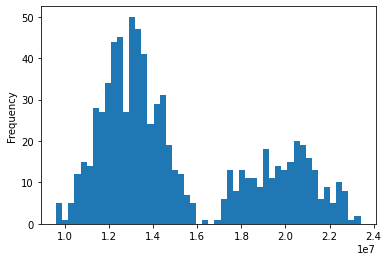

In [343]:
temp=df.loc[df['AREA']=='Anna Nagar']
temp['SALES_PRICE'].plot.hist(bins=50)

<AxesSubplot:xlabel='DIST_MAINROAD', ylabel='SALES_PRICE'>

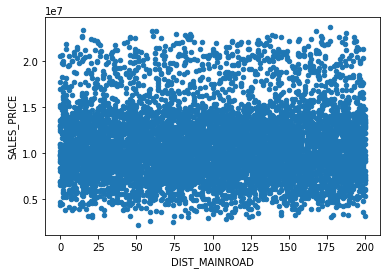

In [347]:
df.plot.scatter('DIST_MAINROAD','SALES_PRICE')

In [346]:
df.groupby(['STREET']).SALES_PRICE.median()

STREET
Gravel       10847225
No Access     9406050
Paved        10470070
Name: SALES_PRICE, dtype: int64

<AxesSubplot:xlabel='SALES_PRICE', ylabel='COMMIS'>

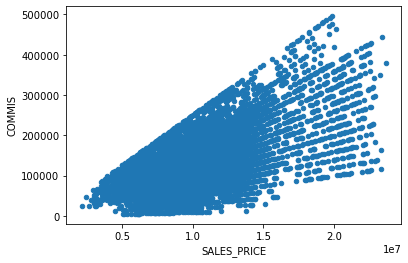

In [352]:
df.plot.scatter('SALES_PRICE','COMMIS')